## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.538282  1.556150  0.289967  0.065325  0.067295 -1.176359
1 -0.121819 -0.168338  1.271117 -0.639709 -0.108810 -0.078637
2 -0.388931 -0.697120 -0.584993 -1.115891  0.804996 -0.977524
3  1.337265  0.546382  1.620926  1.410668  0.307668  2.070236
4 -1.254219 -1.298121 -1.481974 -1.203591 -1.254059 -1.562152


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0262293	total: 69.3ms	remaining: 1m 9s
1:	learn: 1.0131151	total: 70ms	remaining: 35s
2:	learn: 1.0002448	total: 70.6ms	remaining: 23.5s
3:	learn: 0.9892191	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9772851	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9664566	total: 72.4ms	remaining: 12s
6:	learn: 0.9545280	total: 73ms	remaining: 10.4s
7:	learn: 0.9427508	total: 73.6ms	remaining: 9.13s
8:	learn: 0.9331501	total: 74.1ms	remaining: 8.16s
9:	learn: 0.9235225	total: 74.6ms	remaining: 7.38s
10:	learn: 0.9131485	total: 75.1ms	remaining: 6.75s
11:	learn: 0.9014129	total: 75.7ms	remaining: 6.23s
12:	learn: 0.8922149	total: 76.2ms	remaining: 5.79s
13:	learn: 0.8826436	total: 76.7ms	remaining: 5.41s
14:	learn: 0.8752616	total: 77.3ms	remaining: 5.07s
15:	learn: 0.8649988	total: 77.7ms	remaining: 4.78s
16:	learn: 0.8560932	total: 78.3ms	remaining: 4.53s
17:	learn: 0.8471699	total: 78.9ms	remaining: 4.3s
18:	learn: 0.8382932	total: 79.4ms	remaining: 4.1s
19

83:	learn: 0.4396312	total: 109ms	remaining: 1.19s
84:	learn: 0.4354295	total: 109ms	remaining: 1.18s
85:	learn: 0.4316937	total: 110ms	remaining: 1.17s
86:	learn: 0.4273467	total: 110ms	remaining: 1.16s
87:	learn: 0.4235146	total: 111ms	remaining: 1.15s
88:	learn: 0.4191696	total: 111ms	remaining: 1.14s
89:	learn: 0.4157262	total: 112ms	remaining: 1.13s
90:	learn: 0.4117316	total: 112ms	remaining: 1.12s
91:	learn: 0.4076221	total: 112ms	remaining: 1.11s
92:	learn: 0.4043998	total: 113ms	remaining: 1.1s
93:	learn: 0.4009843	total: 113ms	remaining: 1.09s
94:	learn: 0.3972688	total: 114ms	remaining: 1.08s
95:	learn: 0.3936420	total: 114ms	remaining: 1.07s
96:	learn: 0.3908701	total: 115ms	remaining: 1.07s
97:	learn: 0.3878229	total: 115ms	remaining: 1.06s
98:	learn: 0.3838225	total: 115ms	remaining: 1.05s
99:	learn: 0.3803017	total: 116ms	remaining: 1.04s
100:	learn: 0.3764405	total: 116ms	remaining: 1.03s
101:	learn: 0.3734041	total: 117ms	remaining: 1.03s
102:	learn: 0.3699134	total: 1

255:	learn: 0.1094962	total: 188ms	remaining: 546ms
256:	learn: 0.1088048	total: 189ms	remaining: 545ms
257:	learn: 0.1080113	total: 189ms	remaining: 543ms
258:	learn: 0.1072988	total: 189ms	remaining: 542ms
259:	learn: 0.1066840	total: 190ms	remaining: 540ms
260:	learn: 0.1059209	total: 190ms	remaining: 538ms
261:	learn: 0.1052312	total: 191ms	remaining: 537ms
262:	learn: 0.1045282	total: 191ms	remaining: 535ms
263:	learn: 0.1037999	total: 192ms	remaining: 534ms
264:	learn: 0.1028980	total: 192ms	remaining: 533ms
265:	learn: 0.1020780	total: 193ms	remaining: 532ms
266:	learn: 0.1012146	total: 193ms	remaining: 530ms
267:	learn: 0.1004674	total: 194ms	remaining: 529ms
268:	learn: 0.0997768	total: 194ms	remaining: 528ms
269:	learn: 0.0988434	total: 195ms	remaining: 526ms
270:	learn: 0.0982317	total: 195ms	remaining: 525ms
271:	learn: 0.0974717	total: 196ms	remaining: 523ms
272:	learn: 0.0967882	total: 196ms	remaining: 522ms
273:	learn: 0.0960424	total: 197ms	remaining: 521ms
274:	learn: 

479:	learn: 0.0331896	total: 292ms	remaining: 316ms
480:	learn: 0.0329849	total: 293ms	remaining: 316ms
481:	learn: 0.0329039	total: 293ms	remaining: 315ms
482:	learn: 0.0328249	total: 294ms	remaining: 314ms
483:	learn: 0.0327477	total: 294ms	remaining: 314ms
484:	learn: 0.0325470	total: 295ms	remaining: 313ms
485:	learn: 0.0324691	total: 295ms	remaining: 312ms
486:	learn: 0.0323923	total: 295ms	remaining: 311ms
487:	learn: 0.0322439	total: 296ms	remaining: 310ms
488:	learn: 0.0320334	total: 296ms	remaining: 310ms
489:	learn: 0.0319599	total: 297ms	remaining: 309ms
490:	learn: 0.0319217	total: 297ms	remaining: 308ms
491:	learn: 0.0318476	total: 298ms	remaining: 307ms
492:	learn: 0.0316596	total: 298ms	remaining: 307ms
493:	learn: 0.0316176	total: 299ms	remaining: 306ms
494:	learn: 0.0314361	total: 299ms	remaining: 305ms
495:	learn: 0.0312884	total: 300ms	remaining: 305ms
496:	learn: 0.0312520	total: 300ms	remaining: 304ms
497:	learn: 0.0311454	total: 301ms	remaining: 303ms
498:	learn: 

644:	learn: 0.0174247	total: 372ms	remaining: 205ms
645:	learn: 0.0173765	total: 372ms	remaining: 204ms
646:	learn: 0.0173152	total: 373ms	remaining: 203ms
647:	learn: 0.0172814	total: 373ms	remaining: 203ms
648:	learn: 0.0172167	total: 374ms	remaining: 202ms
649:	learn: 0.0171571	total: 374ms	remaining: 201ms
650:	learn: 0.0170940	total: 375ms	remaining: 201ms
651:	learn: 0.0170611	total: 375ms	remaining: 200ms
652:	learn: 0.0170150	total: 376ms	remaining: 200ms
653:	learn: 0.0169742	total: 376ms	remaining: 199ms
654:	learn: 0.0168888	total: 377ms	remaining: 198ms
655:	learn: 0.0168256	total: 377ms	remaining: 198ms
656:	learn: 0.0167938	total: 378ms	remaining: 197ms
657:	learn: 0.0167624	total: 378ms	remaining: 196ms
658:	learn: 0.0167009	total: 378ms	remaining: 196ms
659:	learn: 0.0166436	total: 379ms	remaining: 195ms
660:	learn: 0.0165622	total: 380ms	remaining: 195ms
661:	learn: 0.0165314	total: 380ms	remaining: 194ms
662:	learn: 0.0164743	total: 381ms	remaining: 193ms
663:	learn: 

862:	learn: 0.0086316	total: 476ms	remaining: 75.5ms
863:	learn: 0.0086096	total: 476ms	remaining: 75ms
864:	learn: 0.0085880	total: 477ms	remaining: 74.4ms
865:	learn: 0.0085486	total: 477ms	remaining: 73.9ms
866:	learn: 0.0085276	total: 478ms	remaining: 73.3ms
867:	learn: 0.0085071	total: 478ms	remaining: 72.7ms
868:	learn: 0.0084685	total: 479ms	remaining: 72.1ms
869:	learn: 0.0084486	total: 479ms	remaining: 71.6ms
870:	learn: 0.0084294	total: 480ms	remaining: 71ms
871:	learn: 0.0083916	total: 480ms	remaining: 70.5ms
872:	learn: 0.0083735	total: 480ms	remaining: 69.9ms
873:	learn: 0.0083556	total: 481ms	remaining: 69.3ms
874:	learn: 0.0083362	total: 481ms	remaining: 68.8ms
875:	learn: 0.0082994	total: 482ms	remaining: 68.2ms
876:	learn: 0.0082818	total: 482ms	remaining: 67.6ms
877:	learn: 0.0082644	total: 483ms	remaining: 67.1ms
878:	learn: 0.0082284	total: 483ms	remaining: 66.5ms
879:	learn: 0.0081998	total: 484ms	remaining: 66ms
880:	learn: 0.0081651	total: 484ms	remaining: 65.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

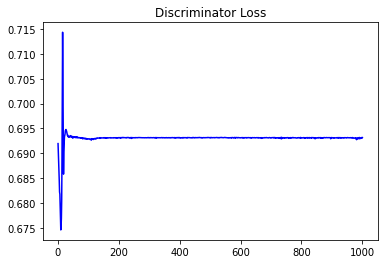

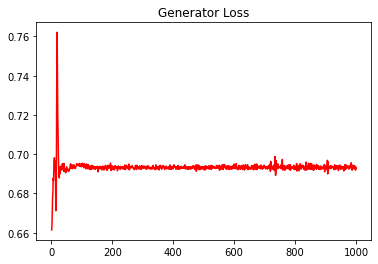

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13754037752239556


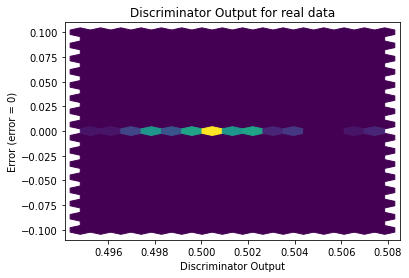

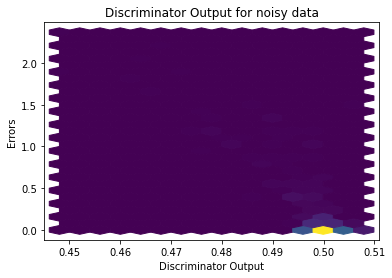

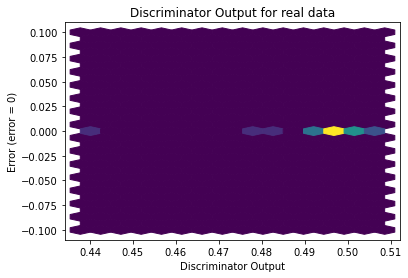

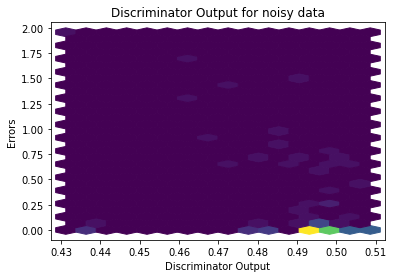

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


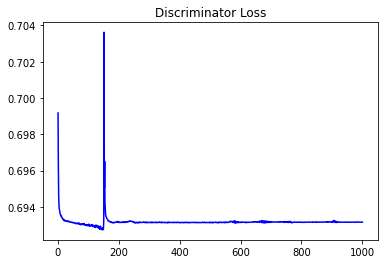

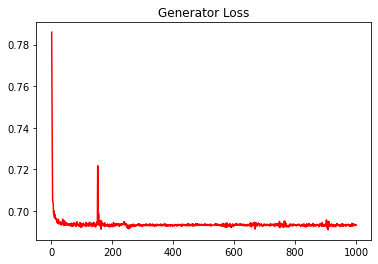

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1576359617176927


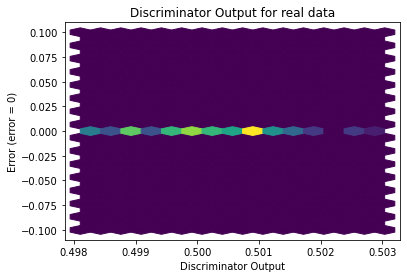

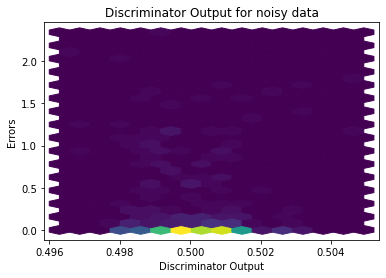

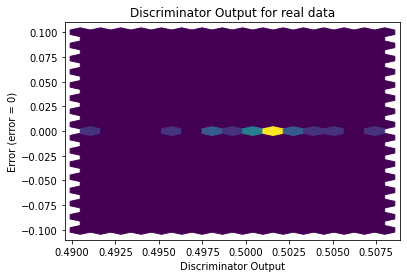

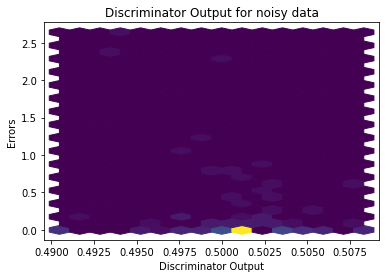

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0209]], requires_grad=True)
